In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1) 데이터 불러오기
data = load_breast_cancer()

In [21]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
X = pd.DataFrame(data.data, columns=data.feature_names)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
y = pd.Series(data.target)
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int64

In [7]:
X.shape, y.shape

((569, 30), (569,))

In [8]:
y.value_counts()

1    357
0    212
Name: count, dtype: int64

In [9]:
data.target_names #['malignant'--> 악성, 'benign'--> 양성],

array(['malignant', 'benign'], dtype='<U9')

In [10]:
y.value_counts(normalize=True) * 100 #비율로 보고 싶을 때

1    62.741652
0    37.258348
Name: proportion, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% 테스트
    stratify=y,           # 타깃 비율 유지
    random_state=42
)

X_train.shape, X_test.shape

((455, 30), (114, 30))

In [12]:
### 학습시키자...!!
dt = DecisionTreeClassifier(random_state=42);
dt

DecisionTreeClassifier(random_state=42)

In [13]:
# 지도학습이므로 문제+답을 주어야함.
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
y_pred = dt.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

In [15]:
y_test

256    0
428    1
501    0
363    1
564    0
      ..
95     0
128    1
257    0
228    1
488    1
Length: 114, dtype: int64

In [16]:
acc = accuracy_score(y_test, y_pred)
acc

0.9122807017543859

In [17]:
print("정확도 점수는 " , acc * 100, "점")

정확도 점수는  91.22807017543859 점


In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[39,  3],
       [ 7, 65]])

In [24]:
#가장 복잡한 보고서 형태로 보고 싶은 경우
print(classification_report(y_test, y_pred,  target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.85      0.93      0.89        42
      benign       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



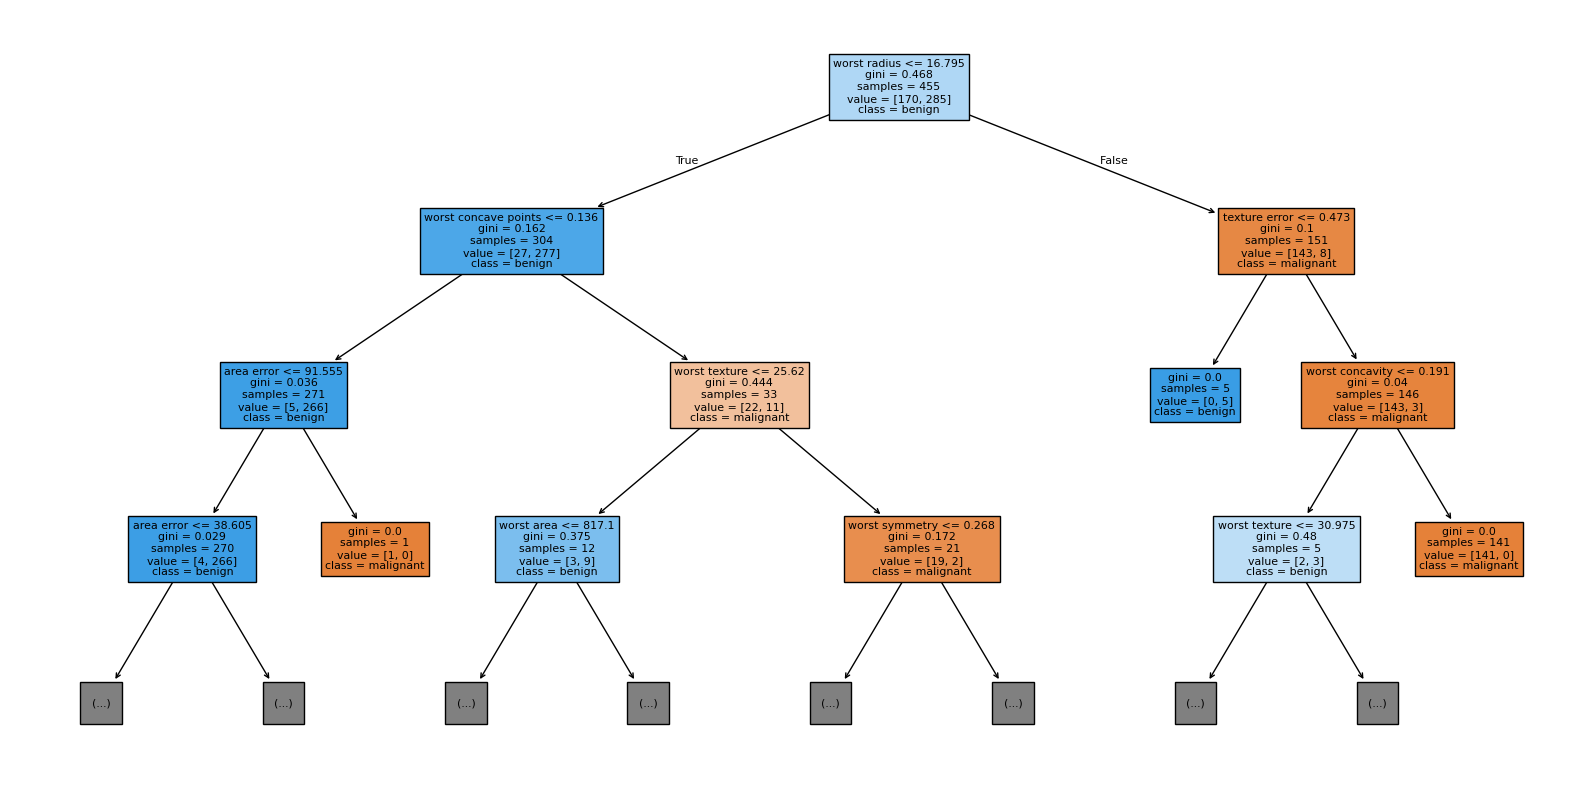

In [27]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    max_depth=3  # 너무 복잡하니 위에서 3단계까지만 표시
)
plt.show()

In [28]:
## knn, svm, decison tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [31]:
# car1 = Car(), 실제 탈차 car1 = 틀 Car()
# 내세탁기 = 세탁기틀(빨강, 건조기)
# 실제로 내가 사용할 대상은 "내세탁기"임, 내세탁기를 대상(object, 객체)
knn = KNeighborsClassifier()
svm = SVC()

In [32]:
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC()

In [33]:
y_pred2 = knn.predict(X_test)
y_pred2

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

In [37]:
y_pred3 = svm.predict(X_test)
y_pred3

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

In [38]:
acc2 = accuracy_score(y_test, y_pred2)
acc2

0.9122807017543859

In [39]:
acc3 = accuracy_score(y_test, y_pred3)
acc3

0.9298245614035088

In [40]:
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[38,  4],
       [ 6, 66]])

In [41]:
cm3 = confusion_matrix(y_test, y_pred3)
cm3

array([[36,  6],
       [ 2, 70]])

In [42]:
print(classification_report(y_test, y_pred2,  target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.86      0.90      0.88        42
      benign       0.94      0.92      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [43]:
print(classification_report(y_test, y_pred3,  target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.86      0.90        42
      benign       0.92      0.97      0.95        72

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



In [46]:
print(cm)

[[39  3]
 [ 7 65]]


In [45]:
print(cm2)

[[38  4]
 [ 6 66]]


In [47]:
dt_cv = DecisionTreeClassifier(random_state=42)

scores = cross_val_score(
    dt_cv,
    X_train,
    y_train,
    cv=5,            # 5-fold
    scoring='accuracy'
)

In [48]:
scores

array([0.91208791, 0.9010989 , 0.9010989 , 0.89010989, 0.94505495])

In [49]:
scores.mean()

np.float64(0.9098901098901099)

In [50]:
scores.std()

np.float64(0.01890620937811566)

In [51]:
knn2 = KNeighborsClassifier()
svm2 = SVC()

In [52]:
scores2 = cross_val_score(
    knn2,
    X_train,
    y_train,
    cv=5,            # 5-fold
    scoring='accuracy'
)

scores3 = cross_val_score(
    svm2,
    X_train,
    y_train,
    cv=5,            # 5-fold
    scoring='accuracy'
)

In [53]:
print(scores2, scores3) #knn, svm

[0.96703297 0.93406593 0.91208791 0.92307692 0.94505495] [0.93406593 0.92307692 0.85714286 0.9010989  0.93406593]


In [56]:
print(scores.mean(), scores2.mean(), scores3.mean()) #dt, knn, svm평균

0.9098901098901099 0.9362637362637363 0.9098901098901099


In [57]:
print(scores.std(), scores2.std(), scores3.std()) #dt, knn, svm표준편차

0.01890620937811566 0.01890620937811566 0.02899100210609435


In [58]:
#  ---> knn이 제일 안정적
# 실제로 모델로 학습시키기 전에
# 미리 데이터를 바꿔가면서 최적의 모델을 찾는 것 : 크로스 검증(교차검증)
# cross_val_score()함수 사용

In [59]:
# 선정된 모델로 최적의 파라메터를 자동으로 찾아서
# 그 찾은 파라메터를 넣어 선택한 모델로 학습시키면 됨.!

In [ ]:
# 그리드 서치 - 여러개의 파라메터를 값을 자동으로 찾게함.

In [60]:
param_grid = {
    'max_depth': [3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(
    dt_cv,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [61]:
grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [62]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [63]:
# 그리드서치로 찾은 최적의 파라메터 수치 
grid.best_params_ 

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [64]:
# 그리드서치로 찾은 최적의 파라메터 수치로 공부했을 때 정확도
grid.best_score_

np.float64(0.9384615384615385)

In [66]:
best_dt = grid.best_estimator_

In [67]:
y_pred_best = best_dt.predict(X_test)

In [68]:
acc_best = accuracy_score(y_test, y_pred_best)

In [69]:
acc_best

0.9385964912280702

In [70]:
cm_best = confusion_matrix(y_test, y_pred_best)

In [71]:
cm_best

array([[39,  3],
       [ 4, 68]])

In [72]:
print("튜닝 후 Classification Report:\n",
      classification_report(y_test, y_pred_best, target_names=data.target_names))

튜닝 후 Classification Report:
               precision    recall  f1-score   support

   malignant       0.91      0.93      0.92        42
      benign       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

